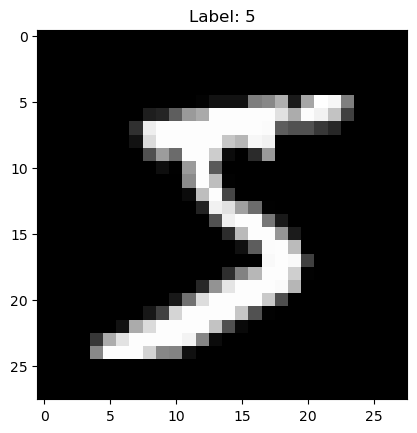

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2574 - accuracy: 0.9266 - val_loss: 0.1399 - val_accuracy: 0.9606
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1153 - accuracy: 0.9655 - val_loss: 0.0961 - val_accuracy: 0.9708
Epoch 3/10
1875/1875 [=

In [ ]:
# Import packages
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Visualize some sample images
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

# Model creation
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into 1D
    keras.layers.Dense(128, activation='relu'),  # Fully connected layer with 128 neurons and ReLU activation
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit)
])

# Model summary
model.summary()

# Compile the model
model.compile(
    optimizer='adam',  # Adam optimizer (usually better than SGD)
    loss='sparse_categorical_crossentropy',  # Sparse cross-entropy loss (labels are integers)
    metrics=['accuracy']  # Track accuracy during training
)

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

# Making a prediction on a random test image
n = random.randint(0, 9999)  # Randomly select an image from the test set
plt.imshow(x_test[n], cmap='gray')
plt.title(f"True label: {y_test[n]}")
plt.show()

# Predict the class (digit) of the randomly selected image
predicted_value = model.predict(np.expand_dims(x_test[n], axis=0))  # Add batch dimension
predicted_digit = np.argmax(predicted_value)  # Get the predicted digit (the index with the highest probability)
print(f"Predicted Handwritten Digit: {predicted_digit}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

# Plot accuracy and loss together
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.show()
